In [1]:
import pandas as pd

df = pd.read_csv("winequality-red.csv")

In [2]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [3]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

#bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [5]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics

#importing matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#this is our global size of label text on plots
matplotlib.rc('xtick',labelsize=50)
matplotlib.rc('ytick',labelsize=50)

#This line ensures that the plot is displayed inside the notebook
%matplotlib inline

In [8]:
# initialize lists to store accuracies for training and test data. 
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

#iterate over a few depth values
for depth in range(1,25):
    #INIT THE MODEL
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]

    # fit the model on given features
    clf.fit(df_train[cols],df_train.quality)
    
    # create training and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    #calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    


### This chart below shows how the model overfit the data

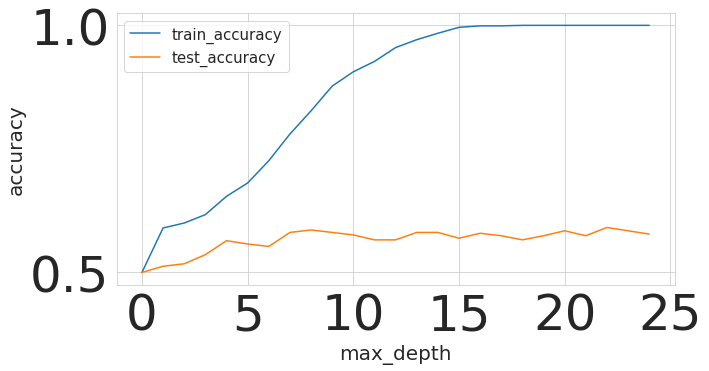

In [9]:
    #create two plots using matplotlib and seaborn. 
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    plt.plot(train_accuracies,label="train_accuracy")
    plt.plot(test_accuracies,label="test_accuracy")
    plt.legend(loc="upper left",prop={'size': 15})
    plt.xticks(range(0,26,5))
    plt.xlabel("max_depth",size=20)
    plt.ylabel("accuracy",size=20)
    plt.show()

# Cross validation